In [52]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет рукописных цифр mnist

In [53]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Привер элемента

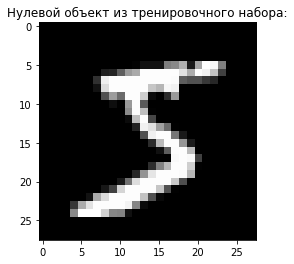

In [54]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

И его отклик

In [55]:
y_train[0]

5

Разделяем исходные данные 70/30 дляобучения и распознавания функцией train_test_spli

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)


Преобразуем данные в матричный вид (в массивах гк)

In [57]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [59]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [61]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

In [62]:
y_pred = clf.predict(X_test)

Результаты работы:

In [63]:
from sklearn.metrics import classification_report, accuracy_score

targets = ['Цифра 0', 'Цифра 1', 'Цифра 2', 'Цифра 3', 'Цифра 4', 'Цифра 5', 'Цифра 6', 'Цифра 7', 'Цифра 8', 'Цифра 9']

print("Общая точность нейронной сети: " + str(accuracy_score(y_test, y_pred)))
print('')
print(classification_report(y_test, y_pred, target_names = targets))

Общая точность нейронной сети: 0.6836111111111111

              precision    recall  f1-score   support

     Цифра 0       0.89      0.86      0.88      1693
     Цифра 1       0.94      0.81      0.87      2075
     Цифра 2       0.46      0.58      0.51      1763
     Цифра 3       0.70      0.79      0.74      1873
     Цифра 4       0.78      0.78      0.78      1756
     Цифра 5       0.50      0.45      0.48      1591
     Цифра 6       0.44      0.37      0.40      1766
     Цифра 7       0.75      0.78      0.77      1886
     Цифра 8       0.64      0.64      0.64      1773
     Цифра 9       0.72      0.71      0.71      1824

    accuracy                           0.68     18000
   macro avg       0.68      0.68      0.68     18000
weighted avg       0.69      0.68      0.68     18000

